In [ ]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import pygal
import sys
import cv2
from google.colab.patches import cv2_imshow
LimitIteracji = 50
#7.8
PikselePoziomo = 600
PikselePionowo = 558

poczatek_x = -2
koniec_x = 0.8
poczatek_y = -1.3
koniec_y = 1.3


obraz = Image.new('HSV', (PikselePoziomo, PikselePionowo), (0, 0, 0))
kredka = ImageDraw.Draw(obraz)

for x in range(0, PikselePoziomo):
    for y in range(0, PikselePionowo):
        c = complex(poczatek_x + (x / PikselePoziomo) * (koniec_x - poczatek_x),
                    poczatek_y + (y / PikselePionowo) * (koniec_y - poczatek_y))
        z, liczba_krokow = 0, 0
        while abs(z) <= 2 and liczba_krokow<LimitIteracji:
            z = z * z + c
            liczba_krokow += 1
        m = liczba_krokow
        odcien = int(255 * m / LimitIteracji)
        nasycenie = 255
        jasnosc = 255 if m < LimitIteracji else 0
        kredka.point([x, y], (odcien, nasycenie, jasnosc))

obraz.convert('RGB').save('output.png', 'PNG')

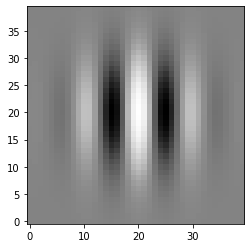

In [ ]:
#7.7 filtr Gabora
f = 0.1
liczba_radianow = math.radians(0.0) # Converts angle x from degrees to radians.
sigma_x = 7.0
sigma_y = 7.0
pole = 20

M = np.zeros((pole * 2, pole * 2))

x = -float(pole)
for i in range(pole * 2):
    y = -float(pole)
    for j in range(pole * 2):
        x_liczba_radianow = x * math.cos(liczba_radianow) + y * math.sin(liczba_radianow)
        y_liczba_radianow = y * math.cos(liczba_radianow) - x * math.sin(liczba_radianow)
        r1 = x_liczba_radianow / sigma_x
        r2 = y_liczba_radianow / sigma_y
        arg = -0.5 * (r1**2 + r2**2)
        M[i, j] = math.exp(arg) * math.cos(2 * math.pi * f * x_liczba_radianow)
        y = y + 1
    x = x + 1

M[:,:] = ((M[:,:] - M.min()) * 255) / (M.max() - M.min())

plt.imshow(M.T, cmap = cm.Greys_r, origin = 'lower')

plt.show()


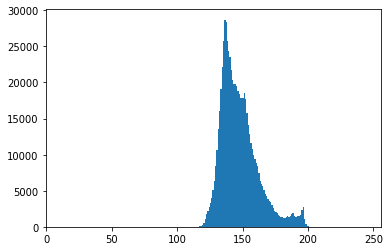

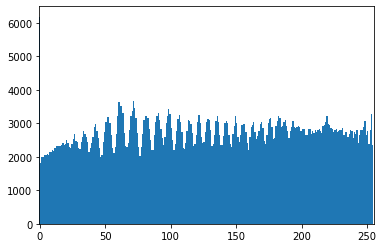

In [ ]:
#Wyrównywanie zdjęcia
#7.2

zdjecie = Image.open("zdjecie_wejsciowe.jpg")
zdjecie_szare = zdjecie.convert(mode = 'L')

wykres_histogramu = cv2.imread('zdjecie_wejsciowe.jpg')
wartosci = wykres_histogramu.mean(axis = 2).flatten()
ilosc, histogram_3 = np.histogram(wartosci, range(257))
plt.bar(histogram_3[:-1] - 0.5, ilosc, width = 1, edgecolor = 'none')
plt.xlim([-0.5, 255.5])
plt.show()

zdjecie_jako_tablica = np.asarray(zdjecie_szare)
tablica_histogramu = np.bincount(zdjecie_jako_tablica.flatten(), minlength = 256)
liczba_pikseli = np.sum(tablica_histogramu)
tablica_histogramu = tablica_histogramu / liczba_pikseli
tablica_histogramu_skumulowanego = np.cumsum(tablica_histogramu)
mapa_pikseli_przetransformowana = np.floor(255 * tablica_histogramu_skumulowanego).astype(np.uint8)
zdjecie_jako_lista_1d = list(zdjecie_jako_tablica.flatten())
wyrownane_zdjecie_jako_lista_1d = [mapa_pikseli_przetransformowana[i] for i in zdjecie_jako_lista_1d]
wyrownane_zdjecie_jako_tablica = np.reshape(np.asarray(wyrownane_zdjecie_jako_lista_1d), zdjecie_jako_tablica.shape)
Image.fromarray(wyrownane_zdjecie_jako_tablica, mode = 'L').save("zdjecie_wyjsciowe.jpg")



wykres_histogramu = cv2.imread('zdjecie_wyjsciowe.jpg')
wartosci = wykres_histogramu.mean(axis = 2).flatten()
ilosc, histogram_3 = np.histogram(wartosci, range(257))
plt.bar(histogram_3[:-1] - 0.5, ilosc, width = 1, edgecolor = 'none')
plt.xlim([-0.5, 255.5])
plt.show()

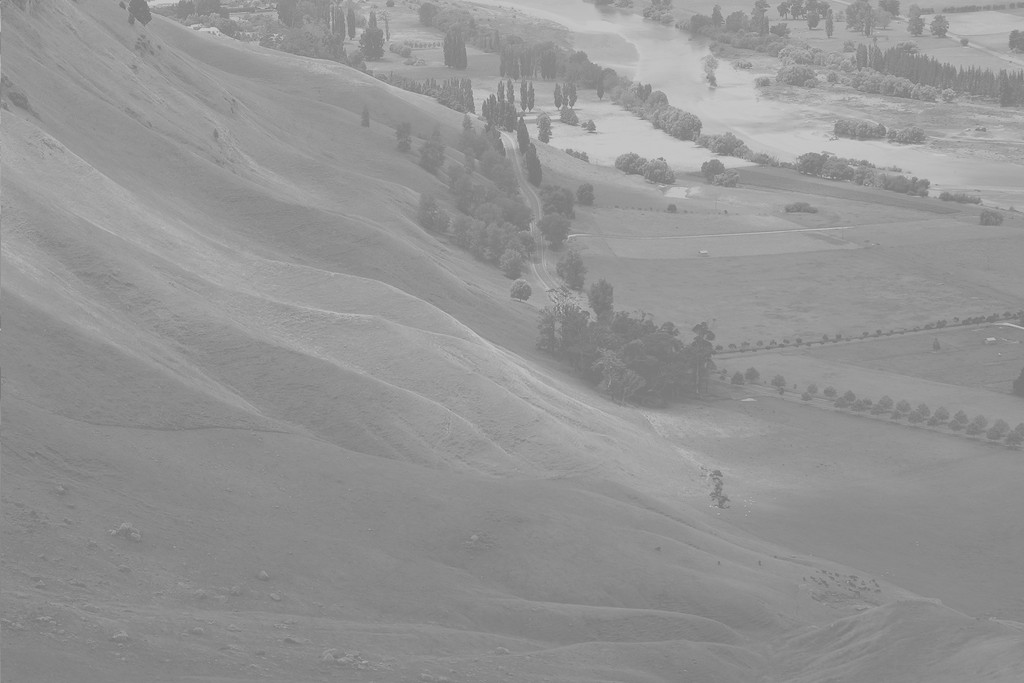

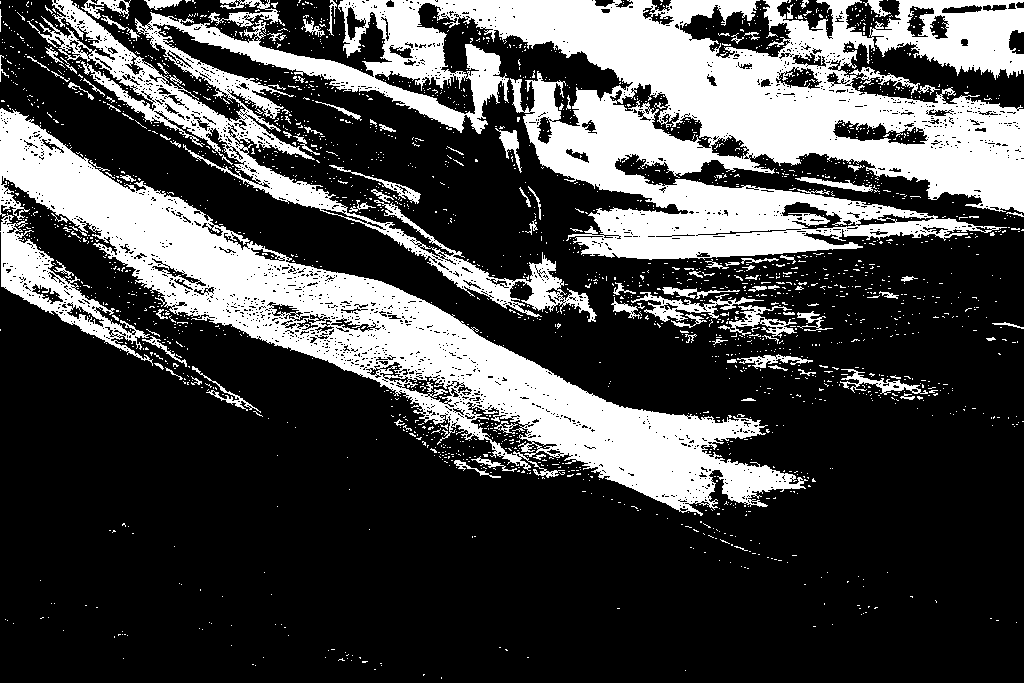

-1

In [ ]:
#7.2 binaryzacja
image='zdjecie_wejsciowe.jpg'
img = cv2.imread('zdjecie_wejsciowe.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray,img_bin = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(img)
cv2_imshow(img_bin)
cv2.waitKey(0)